# Dealing with the Missing values

In [32]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# loading the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


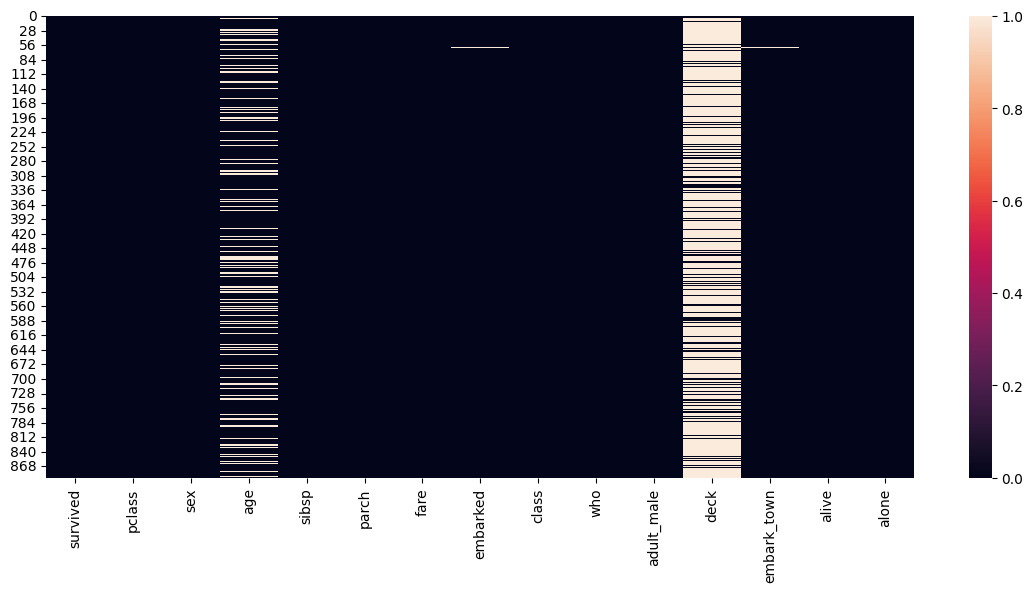

In [34]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull())
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
#  this is the total missing values in each column
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [37]:
# percentage of the missing values in each dataset
round(df.isnull().sum() / len(df) *100, 3).sort_values(ascending=False)

deck           77.217
age            19.865
embarked        0.224
embark_town     0.224
sex             0.000
pclass          0.000
survived        0.000
fare            0.000
parch           0.000
sibsp           0.000
class           0.000
adult_male      0.000
who             0.000
alive           0.000
alone           0.000
dtype: float64

Now, we know that there are 4 columns in the data which have null values 

### Deal with the missing values of 'age' column

In [38]:
# mean of age column
round(df['age'].mean(), 2)

np.float64(29.7)

In [39]:
# median of the age column
round(df['age'].median(), 2)

np.float64(28.0)

In [40]:
# this is how we replace all the missing values with median of that column to resolve the issue of the missing values
df['age'] = df['age'].fillna(df['age'].median())

In [41]:
df['age'].isnull().sum()

np.int64(0)

In [42]:
(df.isnull().sum()/ len(df) *100).sort_values(ascending=False)

deck           77.216611
embarked        0.224467
embark_town     0.224467
age             0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

Now, the deck is the only column which have more than 50% null values. The deck column not most essential column of this dataset so we can drop this column also.

In [43]:
# drop the deck column from the dataset
df.drop('deck', axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [44]:
df.head()
# but now this column is not droped , it is still in the dataframe

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.drop('deck', axis=1, inplace = True) # this inplace argument use to change in the dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [47]:
df.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

Now, we have the two columns in which we have empty cells embark_town and embarked

In [48]:
df['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [52]:
df['embark_town'].mode()[0]

'Southampton'

In [54]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [55]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [56]:
df.isnull().sum().sort_values(ascending=False)

embarked       2
survived       0
sex            0
age            0
sibsp          0
pclass         0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [57]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [58]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

At the end there is no missing value in this dataset

# We can also impute the missing values with sklearn Library

In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

We use simple imputer to replace missing values in the dataset

In [67]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [63]:
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Multivariate Impution

In [81]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [79]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [83]:
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['age'] = imputer.fit_transform(df[['age']], )
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Imputing missing values by using "Forward fill" and "Backward fill"

In [84]:
# fffill and backword fill
df = sns.load_dataset('titanic')

In [88]:
# using fffill impute missing values of the age column
df['age'] = df['age'].ffill
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [90]:
# using backward filling with the missing values of deck column
df['deck'] = df['deck'].backfill
df.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
age            0
sibsp          0
pclass         0
sex            0
fare           0
parch          0
who            0
class          0
adult_male     0
deck           0
alive          0
alone          0
dtype: int64

# KNN use for imputing the missing values 

In [95]:
df = sns.load_dataset('titanic')

In [97]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

### Drop all the rows which have null values

In [100]:
df.dropna(inplace=True)
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64